In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
!pip install --upgrade pandas-datareader

In [2]:
# We should take bigger timeframe for our model to be accurate
start = '2010-01-01'
end = '2022-07-12'

# User can take any stock picker
df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-06,144.119995,141.080002,141.350006,142.919998,74064300.0,142.919998
2022-07-07,146.550003,143.279999,143.289993,146.350006,66253700.0,146.350006
2022-07-08,147.550003,145.000000,145.259995,147.039993,64493200.0,147.039993
2022-07-11,146.639999,143.779999,145.669998,144.869995,63141600.0,144.869995
2022-07-12,148.449997,145.050003,145.759995,145.860001,77588800.0,145.860001


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546383
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [5]:
# Dropping Date and Adj Close Column
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


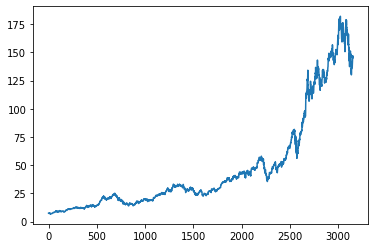

In [6]:
# Plotting DataFrame
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3148,144.119995,141.080002,141.350006,142.919998,74064300.0
3149,146.550003,143.279999,143.289993,146.350006,66253700.0
3150,147.550003,145.000000,145.259995,147.039993,64493200.0
3151,146.639999,143.779999,145.669998,144.869995,63141600.0


In [8]:
# If 100 days moving average if above 200 days moving average it means stock prices are inflating.
# 100 days moving average
# Moving average for first 100 days is not defined as we need at least 100
# days data to get 100 day moving average
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3148    156.230401
3149    155.972701
3150    155.756701
3151    155.516600
3152    155.247301
Name: Close, Length: 3153, dtype: float64

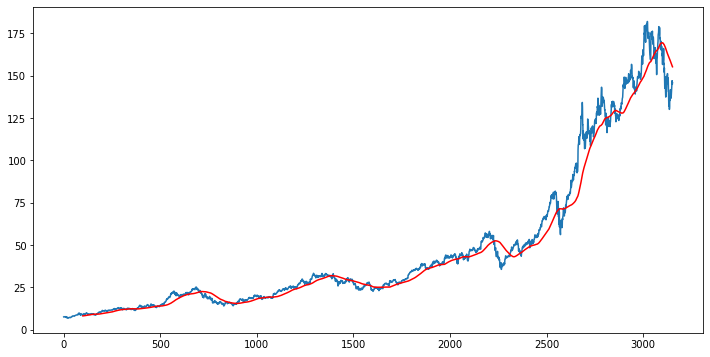

In [9]:
# Plotting 100 days moving average graph
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3148    158.25365
3149    158.27070
3150    158.28875
3151    158.28385
3152    158.27900
Name: Close, Length: 3153, dtype: float64

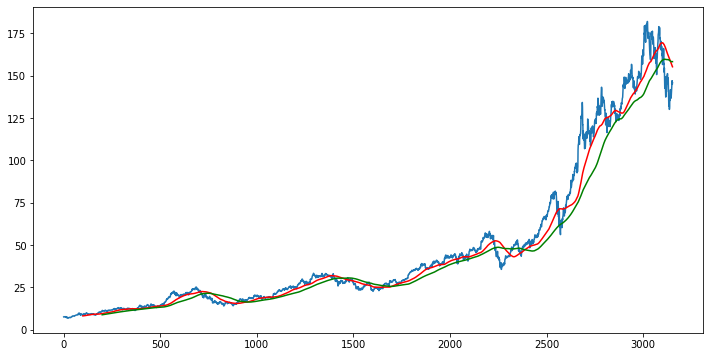

In [11]:
# Plotting 200 days moving average graph
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(3153, 5)

In [13]:
# Splitting data into training and testing
# We take 70% data for training and 30% for testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int (len(df))])
print(data_training.shape)
print(data_testing.shape)

(2207, 1)
(946, 1)


In [14]:
# Now we should move on to scaling down data for LSTM model
# We have to scale down it between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [15]:
# scaler.fit_transform return an array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [1.        ],
       [0.98006198],
       [0.96198089]])

In [16]:
# Shape of data training array
data_training_array.shape

(2207, 1)

In [17]:
# First 100 days will be x_train
# And predicted value will be y_train
# In short x_train predicts y_train
x_train = []
y_train = [] 
for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [18]:
# Converting x_train and y_train to numpy array
x_train, y_train = np.array(x_train),np.array(y_train)
x_train.shape
y_train.shape

(2107,)

In [19]:
#***Creating ML Model***

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
# Adding Layers
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

In [21]:
# Connecting all layers
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
# Training Model
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
66/66 [==============================] - 22s 248ms/step - loss: 0.0301
Epoch 2/50
66/66 [==============================] - 17s 250ms/step - loss: 0.0053
Epoch 3/50
66/66 [==============================] - 16s 246ms/step - loss: 0.0050
Epoch 4/50
66/66 [==============================] - 16s 244ms/step - loss: 0.0052
Epoch 5/50
66/66 [==============================] - 16s 249ms/step - loss: 0.0041
Epoch 6/50
66/66 [==============================] - 16s 247ms/step - loss: 0.0042
Epoch 7/50
66/66 [==============================] - 16s 249ms/step - loss: 0.0037
Epoch 8/50
66/66 [==============================] - 16s 249ms/step - loss: 0.0046
Epoch 9/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0040
Epoch 10/50
66/66 [==============================] - 17s 263ms/step - loss: 0.0034
Epoch 11/50
66/66 [==============================] - 17s 259ms/step - loss: 0.0028
Epoch 12/50
66/66 [==============================] - 16s 244ms/step - loss: 0.0030
Epoch 13/50
6

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()
# This is the testing data

In [ ]:
# To scale down input data
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

In [ ]:
x_test = []
y_test = []
for i in range (100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# Making predictions
y_predicted = model.predict(x_test)
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00682769
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test ,'b',label='Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()